## 라이브러리 호출

In [25]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 안정성 기준 만들기

신규 데이터 전처리 : 연분기-상권 기준 데이터

In [2]:
import pandas as pd
import numpy as np

# 파일 경로 설정
file_sales = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수.csv"
file_general = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수.csv"
output_file_sales = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화.csv"
output_file_general = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화.csv"

# 데이터 불러오기
df_sales = pd.read_csv(file_sales)
df_general = pd.read_csv(file_general)

# 결측치 및 inf 처리
df_sales.replace([np.inf, -np.inf], 0, inplace=True)
df_sales.fillna(0, inplace=True)
df_general.replace([np.inf, -np.inf], 0, inplace=True)
df_general.fillna(0, inplace=True)

# 삭제할 컬럼 정의
drop_columns = ["업종명", "유사_업종_점포_수", "개업율", "폐업률"]
meta_columns_sales = ["자치구명", "서울_운영_영업_개월_평균", "서울_폐업_영업_개월_평균", "유동인구수"]
meta_columns_general = ["자치구명", "서울_운영_영업_개월_평균", "서울_폐업_영업_개월_평균"]

# 매출 변수 데이터 처리
df_sales_meta = df_sales.groupby(["연분기", "상권명"])[meta_columns_sales].first().reset_index()
df_sales.drop(columns=drop_columns + meta_columns_sales, inplace=True)
df_sales_grouped = df_sales.groupby(["연분기", "상권명"], as_index=False).sum()
df_sales_final = df_sales_grouped.merge(df_sales_meta, on=["연분기", "상권명"], how="left")
df_sales_final.to_csv(output_file_sales, index=False, encoding='utf-8-sig')

# 일반 변수 데이터 처리 (점포_수_변동성 열부터 뒤의 모든 열 삭제)
N = df_general.columns.get_loc("점포_수_변동성")  # 점포_수_변동성 위치 찾기
df_general = df_general.iloc[:, :N]  # 점포_수_변동성 이전의 컬럼만 남김

df_general_meta = df_general.groupby(["연분기", "상권명"])[meta_columns_general].first().reset_index()
df_general.drop(columns=drop_columns + meta_columns_general, inplace=True)
df_general_grouped = df_general.groupby(["연분기", "상권명"], as_index=False).sum()
df_general_final = df_general_grouped.merge(df_general_meta, on=["연분기", "상권명"], how="left")
df_general_final.to_csv(output_file_general, index=False, encoding='utf-8-sig')

print("데이터 처리 완료 및 저장됨.")

데이터 처리 완료 및 저장됨.


새 변수 생성

In [13]:
import pandas as pd

# 파일 경로 설정
file_sales = "C:\\Users\\m\\Desktop\\변수 생성용 데이터\\서울시_상권분석_서비스_매출변수_그룹화.csv"
file_general = "C:\\Users\\m\\Desktop\\변수 생성용 데이터\\서울시_상권분석_서비스_일반변수_그룹화.csv"

# 데이터 불러오기
df_sales = pd.read_csv(file_sales, encoding='euc-kr')
df_general = pd.read_csv(file_general, encoding='euc-kr')

# 개업율 및 폐업률 계산
df_sales["개업율"] = (df_sales["점포_수"] / df_sales["개업_점포_수"].replace(0, np.nan)).round(0)
df_sales["폐업률"] = (df_sales["점포_수"] / df_sales["폐업_점포_수"].replace(0, np.nan)).round(0)
df_sales["프랜차이즈 비율"] = df_sales["점포_수"] / df_sales["프랜차이즈_점포_수"].replace(0, np.nan)

df_general["개업율"] = (df_general["점포_수"] / df_general["개업_점포_수"].replace(0, np.nan)).round(0)
df_general["폐업률"] = (df_general["점포_수"] / df_general["폐업_점포_수"].replace(0, np.nan)).round(0)
df_general["프랜차이즈 비율"] = df_general["점포_수"] / df_general["프랜차이즈_점포_수"].replace(0, np.nan)

# 추가 변수 생성
df_sales["폐업-개업 비율"] = df_sales["폐업_점포_수"] / (df_sales["개업_점포_수"] + 1)
df_sales["유동인구별 매출"] = df_sales["매출_금액"] / df_sales["유동인구수"]
df_sales["유동인구당 점포수"] = df_sales["점포_수"] / df_sales["유동인구수"]
df_sales["매출 전환률"] = df_sales["매출_건수"] / df_sales["유동인구수"]
df_sales["점포당 매출"] = df_sales["매출_금액"] / df_sales["점포_수"]
df_sales["점포당 매출 건수"] = df_sales["매출_건수"] / df_sales["점포_수"]

# 일반 변수 파일 추가 변수 생성
df_general["폐업-개업 비율"] = df_general["폐업_점포_수"] / (df_general["개업_점포_수"] + 1)

# 결과 저장
df_sales.to_csv(file_sales, index=False, encoding='utf-8-sig')
df_general.to_csv(file_general, index=False, encoding='utf-8-sig')

In [19]:
import pandas as pd
import numpy as np

# 파일 경로 설정
file_sales = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화.csv"
file_general = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화.csv"

# 데이터 불러오기
df_sales = pd.read_csv(file_sales)
df_general = pd.read_csv(file_general)

# 개업율 및 폐업률 계산 (0으로 나누는 오류 방지)
df_sales["개업율"] = round((df_sales["개업_점포_수"] / (df_sales["점포_수"] + 1)) * 100, 0)
df_sales["폐업률"] = round((df_sales["폐업_점포_수"] / (df_sales["점포_수"] + 1)) * 100, 0)

df_general["개업율"] = round((df_general["개업_점포_수"] / (df_general["점포_수"] + 1)) * 100, 0)
df_general["폐업률"] = round((df_general["폐업_점포_수"] / (df_general["점포_수"] + 1)) * 100, 0)

# 추가 변수 생성 (0으로 나누는 오류 방지)
df_sales["프랜차이즈 비율"] = df_sales["프랜차이즈_점포_수"] / (df_sales["점포_수"] + 1)
df_sales["폐업-개업 비율"] = df_sales["폐업_점포_수"] / (df_sales["개업_점포_수"] + 1)
df_sales["유동인구별 매출"] = df_sales["매출_금액"] / (df_sales["유동인구수"] + 1)
df_sales["유동인구당 점포수"] = df_sales["점포_수"] / (df_sales["유동인구수"] + 1)
df_sales["매출 전환률"] = df_sales["매출_건수"] / (df_sales["유동인구수"] + 1)
df_sales["점포당 매출"] = df_sales["매출_금액"] / (df_sales["점포_수"] + 1)
df_sales["점포당 매출 건수"] = df_sales["매출_건수"] / (df_sales["점포_수"] + 1)

df_general["프랜차이즈 비율"] = df_general["프랜차이즈_점포_수"] / (df_general["점포_수"] + 1)
df_general["폐업-개업 비율"] = df_general["폐업_점포_수"] / (df_general["개업_점포_수"] + 1)

# NaN 값 0으로 채우기
df_sales.fillna(0, inplace=True)
df_general.fillna(0, inplace=True)

# 결과 저장
df_sales.to_csv(file_sales, index=False, encoding='utf-8-sig')
df_general.to_csv(file_general, index=False, encoding='utf-8-sig')

print("파일 저장 완료! NaN 값이 0으로 채워졌습니다.")

파일 저장 완료! NaN 값이 0으로 채워졌습니다.


In [20]:
import pandas as pd

# 파일 경로 설정
file_survival = r"C:\Users\m\Downloads\서울시상권신생기업생존율.csv"
file_sales = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화.csv"
file_general = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화.csv"

# 데이터 불러오기
df_survival = pd.read_csv(file_survival)
df_sales = pd.read_csv(file_sales)
df_general = pd.read_csv(file_general)

# 필요한 컬럼 선택
cols_to_merge = ["연분기", "상권명", "1년생존률", "1년차창업기업수", "1년생존기업수",
                 "3년생존률", "3년차창업기업수", "3년생존기업수",
                 "5년생존률", "5년차창업기업수", "5년생존기업수"]

df_survival = df_survival[cols_to_merge]

# 매출 변수 데이터와 병합
df_sales = df_sales.merge(df_survival, on=["연분기", "상권명"], how="left")

# 일반 변수 데이터와 병합
df_general = df_general.merge(df_survival, on=["연분기", "상권명"], how="left")

# NaN 값 0으로 채우기
df_sales.fillna(0, inplace=True)
df_general.fillna(0, inplace=True)

# 새로운 파일로 저장
file_sales_new = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_생존율추가.csv"
file_general_new = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_생존율추가.csv"

df_sales.to_csv(file_sales_new, index=False, encoding='utf-8-sig')
df_general.to_csv(file_general_new, index=False, encoding='utf-8-sig')

print("병합 완료! 새로운 파일이 저장되었습니다.")

병합 완료! 새로운 파일이 저장되었습니다.


개업-폐업 비율 컬럼 분포 확인


[매출 변수 데이터]
count    33010.000000
mean         0.675646
std          1.037088
min          0.000000
25%          0.000000
50%          0.545455
75%          1.000000
max         71.000000
Name: 폐업-개업 비율, dtype: float64


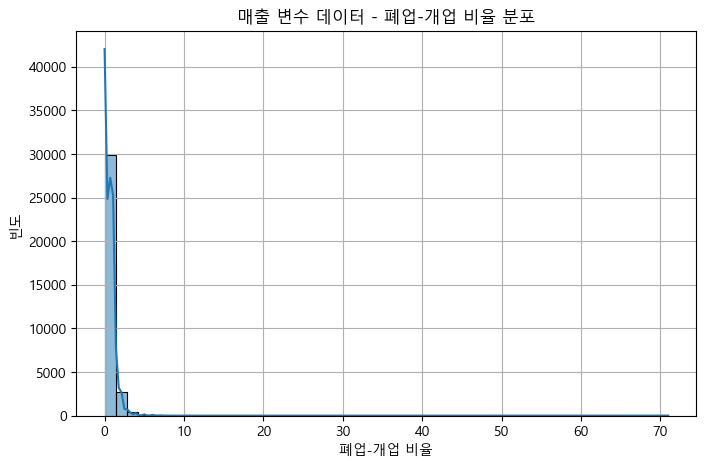


[일반 변수 데이터]
count    33462.000000
mean         0.866119
std          1.116500
min          0.000000
25%          0.421053
50%          0.722222
75%          1.000000
max         83.000000
Name: 폐업-개업 비율, dtype: float64


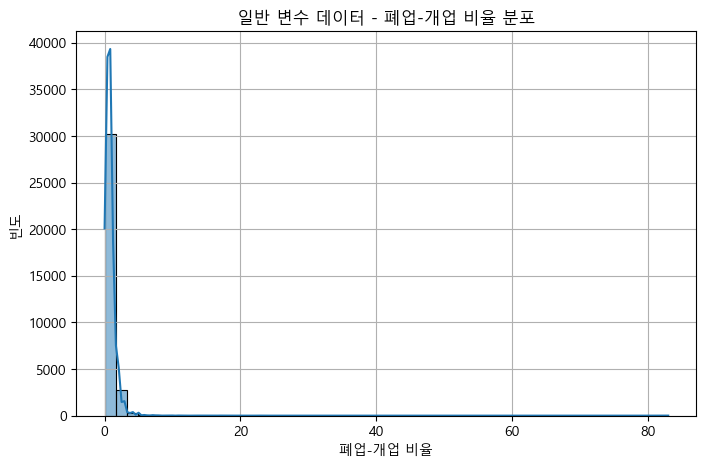

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로 설정
file_sales_new = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_생존율추가.csv"
file_general_new = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_생존율추가.csv"

# 데이터 불러오기
df_sales = pd.read_csv(file_sales_new)
df_general = pd.read_csv(file_general_new)

# 폐업-개업 비율 분포 확인
def check_distribution(df, title):
    column = "폐업-개업 비율"
    
    # 통계 요약 출력
    print(f"\n[{title}]")
    print(df[column].describe())  

    # 히스토그램 그리기
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=50, kde=True)
    plt.title(f"{title} - 폐업-개업 비율 분포")
    plt.xlabel("폐업-개업 비율")
    plt.ylabel("빈도")
    plt.grid()
    plt.show()

# 매출 변수 데이터 분포 확인
check_distribution(df_sales, "매출 변수 데이터")

# 일반 변수 데이터 분포 확인
check_distribution(df_general, "일반 변수 데이터")

In [22]:
import pandas as pd

# 파일 경로 설정
file_sales_new = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_생존율추가.csv"
file_general_new = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_생존율추가.csv"

# 데이터 불러오기
df_sales = pd.read_csv(file_sales_new)
df_general = pd.read_csv(file_general_new)

# 폐업-개업 비율 기준으로 안정성 컬럼 추가
threshold = 0.675646  # 기준값

def add_stability_column(df):
    df["안정성"] = df["폐업-개업 비율"].apply(lambda x: "불안정" if x >= threshold else "안정")
    return df

df_sales = add_stability_column(df_sales)
df_general = add_stability_column(df_general)

# 새로운 파일 저장
file_sales_stable = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv"
file_general_stable = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv"

df_sales.to_csv(file_sales_stable, index=False, encoding="utf-8-sig")
df_general.to_csv(file_general_stable, index=False, encoding="utf-8-sig")

print("파일 저장 완료!")

파일 저장 완료!


### 로그 변환

In [26]:
import pandas as pd
import numpy as np

# 파일 경로
file_paths = [
    "C:\\Users\\m\\Desktop\\변수 생성용 데이터\\서울시_상권분석_서비스_매출변수_그룹화_생존율추가.csv",
    "C:\\Users\\m\\Desktop\\변수 생성용 데이터\\서울시_상권분석_서비스_일반변수_그룹화_생존율추가.csv"
]

# 데이터 처리 함수
def transform_closure_rate(file_path):
    df = pd.read_csv(file_path)
    
    # 폐업-개업 비율 컬럼을 로그 변환 (log1p 사용하여 0 값 처리)
    if '폐업-개업 비율' in df.columns:
        df['폐업-개업 비율_log'] = np.log1p(df['폐업-개업 비율'])
    else:
        print(f"Warning: '폐업-개업 비율' 컬럼이 {file_path}에 없습니다.")
    
    # 변환된 데이터 저장
    output_path = file_path.replace(".csv", "_로그변환.csv")
    df.to_csv(output_path, index=False, encoding='utf-8-sig')
    print(f"변환 완료: {output_path}")

# 각 파일 처리
for path in file_paths:
    transform_closure_rate(path)

변환 완료: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_생존율추가_로그변환.csv
변환 완료: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_생존율추가_로그변환.csv



[매출 변수 데이터]
count    33010.000000
mean         0.675646
std          1.037088
min          0.000000
25%          0.000000
50%          0.545455
75%          1.000000
max         71.000000
Name: 폐업-개업 비율, dtype: float64


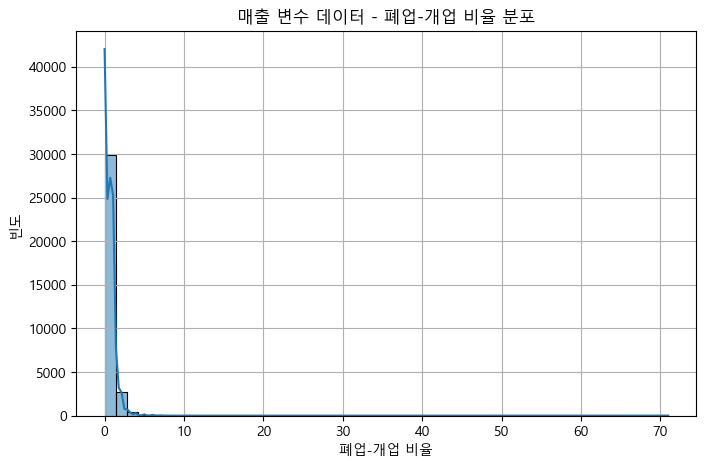


[일반 변수 데이터]
count    33462.000000
mean         0.866119
std          1.116500
min          0.000000
25%          0.421053
50%          0.722222
75%          1.000000
max         83.000000
Name: 폐업-개업 비율, dtype: float64


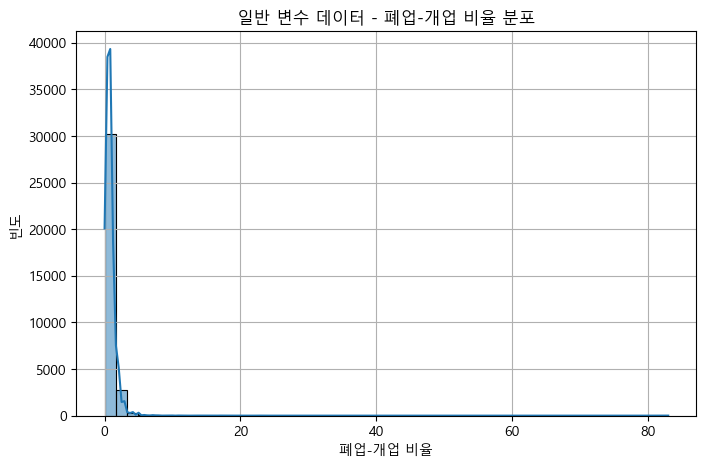

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로 설정
file_sales_new = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_생존율추가_로그변환.csv"
file_general_new = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_생존율추가_로그변환.csv"

# 데이터 불러오기
df_sales = pd.read_csv(file_sales_new)
df_general = pd.read_csv(file_general_new)

# 폐업-개업 비율 분포 확인
def check_distribution(df, title):
    column = "폐업-개업 비율"
    
    # 통계 요약 출력
    print(f"\n[{title}]")
    print(df[column].describe())  

    # 히스토그램 그리기
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=50, kde=True)
    plt.title(f"{title} - 폐업-개업 비율 분포")
    plt.xlabel("폐업-개업 비율")
    plt.ylabel("빈도")
    plt.grid()
    plt.show()

# 매출 변수 데이터 분포 확인
check_distribution(df_sales, "매출 변수 데이터")

# 일반 변수 데이터 분포 확인
check_distribution(df_general, "일반 변수 데이터")

## 가설 1

프랜차이즈 비율과 폐업-개업 비율 간의 상관관계:
           프랜차이즈 비율  폐업-개업 비율
프랜차이즈 비율  1.000000 -0.016188
폐업-개업 비율 -0.016188  1.000000


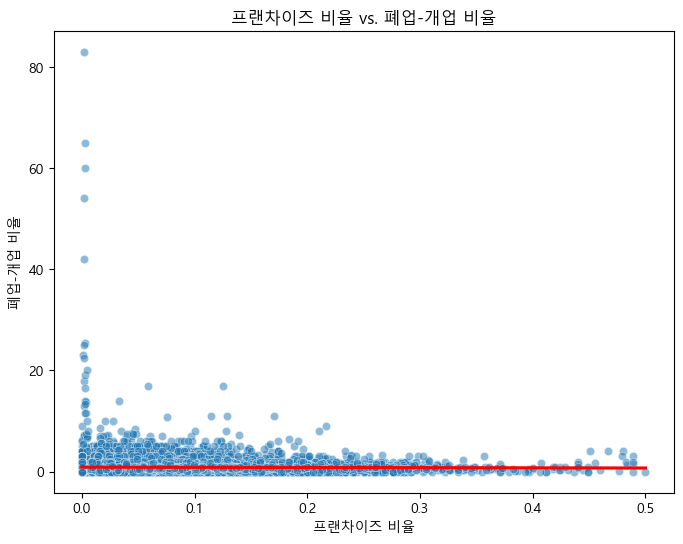

In [ ]:
# 파일 경로
file_path = "C:\\Users\\m\\Desktop\\변수 생성용 데이터\\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv"

# 데이터 불러오기
df = pd.read_csv(file_path)

# 상관관계 분석
if '프랜차이즈 비율' in df.columns and '폐업-개업 비율' in df.columns:
    correlation = df[['프랜차이즈 비율', '폐업-개업 비율']].corr()
    print("프랜차이즈 비율과 폐업-개업 비율 간의 상관관계:\n", correlation)
    
    # 비선형 관계 시각화
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['프랜차이즈 비율'], y=df['폐업-개업 비율'], alpha=0.5)
    sns.regplot(x=df['프랜차이즈 비율'], y=df['폐업-개업 비율'], scatter=False, color='red')
    plt.xlabel('프랜차이즈 비율')
    plt.ylabel('폐업-개업 비율')
    plt.title('프랜차이즈 비율 vs. 폐업-개업 비율')
    plt.show()
else:
    raise ValueError("'프랜차이즈 비율' 또는 '폐업-개업 비율' 컬럼이 존재하지 않습니다.")

# 가설 2

1년생존률과 폐업-개업 비율 간의 상관관계:
              1년생존률  폐업-개업 비율
1년생존률     1.000000 -0.041071
폐업-개업 비율 -0.041071  1.000000


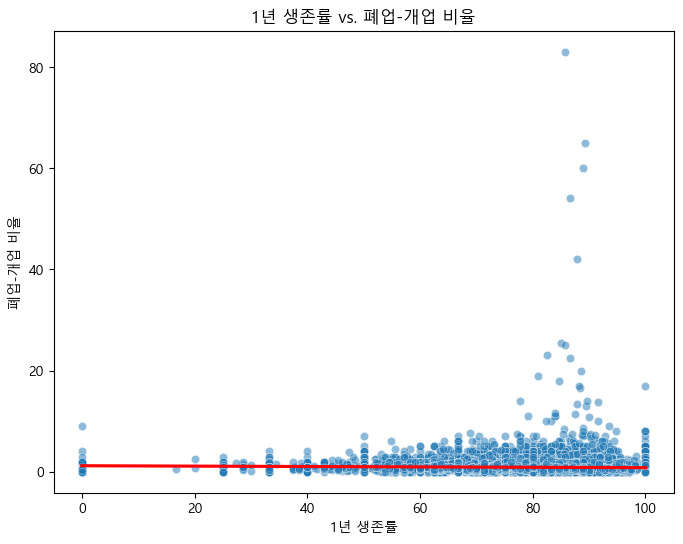

In [45]:
# 데이터 불러오기
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv"
df = pd.read_csv(file_path)

# 문자열 '-'을 NaN으로 변환
df.replace('-', np.nan, inplace=True)

# 필요한 컬럼 숫자로 변환 (오류 발생 시 NaN 처리)
cols_to_convert = ["1년생존률", "폐업-개업 비율"]
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# NaN 제거
df.dropna(subset=cols_to_convert, inplace=True)

# 상관관계 분석
correlation = df[cols_to_convert].corr()
print("1년생존률과 폐업-개업 비율 간의 상관관계:\n", correlation)

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["1년생존률"], y=df["폐업-개업 비율"], alpha=0.5)
sns.regplot(x=df["1년생존률"], y=df["폐업-개업 비율"], scatter=False, color='red')
plt.xlabel("1년 생존률")
plt.ylabel("폐업-개업 비율")
plt.title("1년 생존률 vs. 폐업-개업 비율")
plt.show()

In [47]:
from scipy.stats import spearmanr

spearman_corr, p_value = spearmanr(df['1년생존률'], df['폐업-개업 비율'])
print(f"스피어만 상관계수: {spearman_corr:.4f}, p-value: {p_value:.4f}")

스피어만 상관계수: -0.1256, p-value: 0.0000


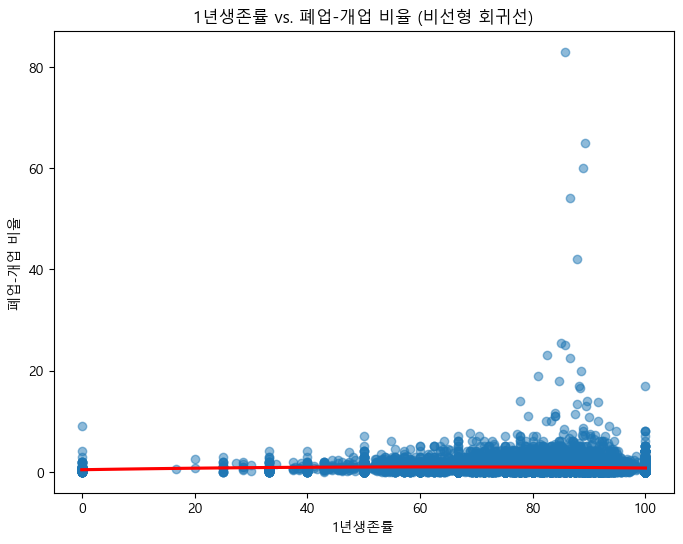

In [49]:
# 비선형 회귀선을 위한 변환
df['1년생존률 제곱'] = np.power(df['1년생존률'], 2)  # 제곱 변환

plt.figure(figsize=(8,6))
sns.regplot(x=df['1년생존률'], y=df['폐업-개업 비율'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, order=2)
plt.xlabel('1년생존률')
plt.ylabel('폐업-개업 비율')
plt.title('1년생존률 vs. 폐업-개업 비율 (비선형 회귀선)')
plt.show()